# Q-2

In [2]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

In [3]:
data= list(map(list,np.loadtxt("/content/q2.dat",dtype="str" ,unpack = True,delimiter=",")))

In [4]:
data=[list(map(float,i))for i in data]

In [11]:
def generate_posterior(mean,variance,data,sigma):
  n=len(data)
  x_mean=sum(data)/n
  denom=(variance)+ ((sigma**2) /n)
  new_mean=((variance*x_mean) + (((sigma**2)/n)*mean))/(denom)
  new_variance=((variance)*((sigma**2) /n))/(denom)
  return new_mean,new_variance
def read_nrows(old_mean,old_variance,sigma,n):
  means,variances=[],[]
  for i in range(n):
    new_mean,new_variance=generate_posterior(old_mean,old_variance,data[i],sigma)
    means.append(new_mean)
    variances.append(new_variance)
    old_variance=new_variance
    old_mean=new_mean
    # print("The new distribution after reading {} rows of data is Normal({},{})".format(str(i+1),str(new_mean),str(new_variance)))
  return means,variances

def create_dataframe(means,variances):
  d=pd.DataFrame({"After n rows":[i+1 for i in range(len(means))],"Mean":means,"Variance":variances})
  return d
def plot_graph(data):
  for i in range(len(data)):
    row=data.loc[i]
    mean,variance=row["Mean"],row["Variance"]
    sigma=math.sqrt(variance)
    x=np.linspace(mean-3*sigma,mean+3*sigma,100)
    plt.plot(x,norm.pdf(x,mean,sigma),label="Row "+str(i))
    i+=1
  if len(data)<10:
    plt.legend()


# 2-A

  After n rows     Mean    Variance
--------------  -------  ----------
             1  7.65972   0.2
             2  8.79373   0.111111
             3  9.12109   0.0769231
             4  9.39047   0.0588235
             5  9.65087   0.047619


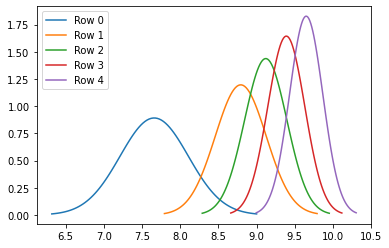

In [12]:
old_mean,old_variance,sigma=0,1,5
n=5
means,variances=read_nrows(old_mean,old_variance,sigma,n)
d=create_dataframe(means,variances)
print(tabulate(d, showindex=False, headers=d.columns))
# print(d.loc[0]["Mean"])
plot_graph(d)

We observe that, as we read each row of data, the mean starts to increase and variance starts to decrease. So the original mean and variance must have been more and less respectively than the initial prior considered. The distance between the curves is considerably more which can be observed in the plot.

# 2-B

  After n rows     Mean    Variance
--------------  -------  ----------
             1  1.91493    0.8
             2  3.29765    0.666667
             3  4.23479    0.571429
             4  4.98869    0.5
             5  5.62967    0.444444


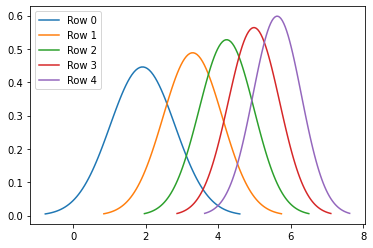

In [13]:
old_mean,old_variance,sigma=0,1,20
n=5
means,variances=read_nrows(old_mean,old_variance,sigma,n)
d=create_dataframe(means,variances)
print(tabulate(d, showindex=False, headers=d.columns))
plot_graph(d)

After increasing the value of sigma, the mean and variances of the curve after reacing each row of data is still follow the same trend. But the distance between the curves is relatively less when compared to the case when sigma = 5.

# 2-C

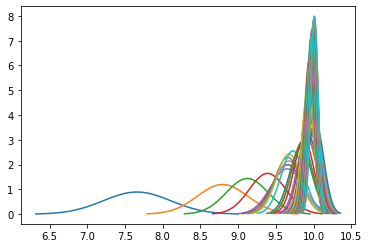

In [14]:
old_mean,old_variance,sigma=0,1,5
n=100
means,variances=read_nrows(old_mean,old_variance,sigma,n)
d=create_dataframe(means,variances)
plot_graph(d)

The means and variances of the posterior function continue to increase and decrease respectively over the 100 rows of data which were read. The distance between the curves is more for the initial rows, but decreases as the number of rows read increase. So, the amount by which the mean and variance of the posterior function change decreases as we read more amount of data.

# 2-D

In [15]:
def read_nrows(old_mean,old_variance,sigma,n):
  means,variances=[],[]
  for i in range(n):
    new_mean,new_variance=generate_posterior(old_mean,old_variance,data[0],sigma)
    means.append(new_mean)
    variances.append(new_variance)
    old_variance=new_variance
    # print("The new distribution after reading {} rows of data is Normal({},{})".format(str(i+1),str(new_mean),str(new_variance)))
  return means,variances

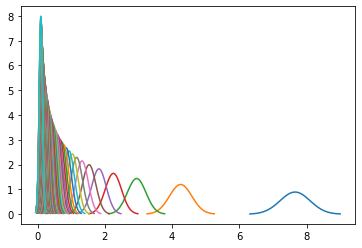

In [16]:
old_mean,old_variance,sigma=0,1,5
n=100
means,variances=read_nrows(old_mean,old_variance,sigma,n)
d=create_dataframe(means,variances)
plot_graph(d)

The means and variances of the posterior function follow the same trend over the 100 rows of data which were read. The distance between the curves is more for the initial rows, but decreases as the number of rows read increase. So, the amount by which the mean and variance of the posterior function change decreases as we read more amount of data.
But when compared to the previous plot, the distance relatively less when we read the same data over and over 100 times.